In [1]:
from netCDF4 import Dataset, Variable
import matplotlib.path as mpath
import cartopy
import xarray
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcol
import matplotlib.cm as cm
import matplotlib.ticker as mticker
from matplotlib.gridspec import GridSpec
import os
import nctoolkit as nct
import regex
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import StrMethodFormatter
import matplotlib.patches as mpatches
from cartopy.util import add_cyclic_point
from matplotlib import colors
import geopandas as gpd
import shapely.geometry as shp
import shapely.ops as ops
import rioxarray
import pyproj
import pandas as pd
from matplotlib.offsetbox import AnchoredText
import matplotlib as mpl
import glob

nctoolkit is using Climate Data Operators version 1.9.8


In [2]:
nct.deep_clean()

In [3]:
os.chdir('/media/jasmine/Album/Project/')
print(os.getcwd())

/media/jasmine/Album/Project


In [4]:
model = "Multimodel"
print(model)
experiment = "ssp585"
print(experiment)

Multimodel
ssp585



## Ice region plot

In [5]:
variable = "siconc"
import cartopy.feature as cfeature

In [6]:
files=glob.glob("Data/{}_*_ice_extent.nc".format(variable))
files = sorted(files)
files

['Data/siconc_ACCESS-ESM1-5_ice_extent.nc',
 'Data/siconc_CMCC-ESM2_ice_extent.nc',
 'Data/siconc_EC-Earth3-CC_ice_extent.nc',
 'Data/siconc_IPSL-CM6A-LR_ice_extent.nc',
 'Data/siconc_MPI-ESM1-2-HR_ice_extent.nc']

In [7]:
for i in range(5):
    globals()[f"model{i}"] = regex.search(r"(?<=Data/.*?_)[^_]*", files[i]).group()
    
    nc = xarray.open_dataset(files[i])
    nc = nc.sel(lat = slice(-90, -20))

    lat = nc['lat'].values 
    lon = nc['lon'].values
    globals()[f"var{i}"] = nc[variable].values
    
    globals()[f"x{i}"], globals()[f"y{i}"] = np.meshgrid(lon, lat)

/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:385: ShapelyDeprecationWarning: Iteratio

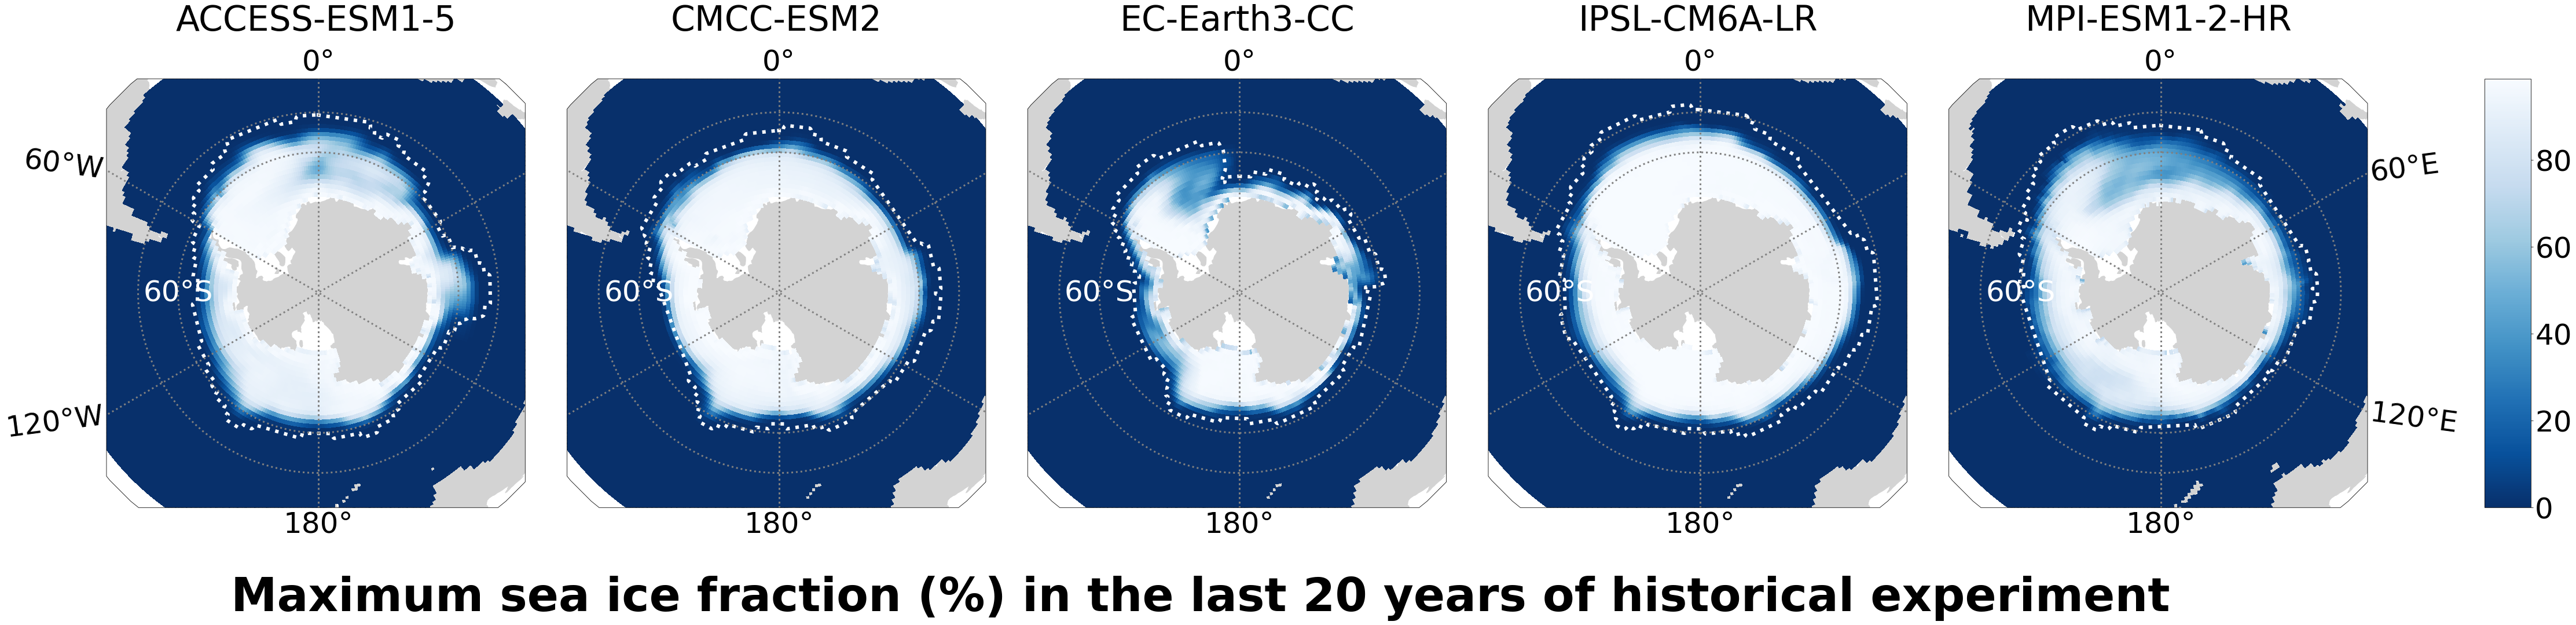

In [9]:
fig = plt.figure(figsize=(70,21))
fig.subplots_adjust(wspace = 0.1)
fig.suptitle("Maximum sea ice fraction (%) in the last 20 years of historical experiment", fontweight = "bold", y=0.18, fontsize = 80)

gs = GridSpec(1, 5, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[0, 3])
ax5 = fig.add_subplot(gs[0, 4])


## Plot 1
ax1 = plt.subplot(1, 5, 1, projection=cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90))
ax1.set_extent([-180, 180, -90, -40], cartopy.crs.PlateCarree())

ax1.set_title("{}".format(model0), fontsize = 60, pad = 30)

gl1 = ax1.gridlines(crs = cartopy.crs.PlateCarree(),
                  draw_labels = True,
                  color = 'grey',
                  linestyle = ':',
                    linewidth = 3,
                  y_inline = True,
                  x_inline = False) 

gl1.left_labels = True
gl1.right_labels = False

gl1.xlabel_style = {'size': 50}
gl1.ylabel_style = {'color' : 'white', 'size': 50}

gl1.ylocator = mticker.FixedLocator([-60, -50])

plt.draw()
for ea in gl1.label_artists:
    if ea[0]== 'lat':
        tx = ea[2]
        xy = tx.get_position()
        if xy[0]!=-90:
            tx.set_position([-90, xy[1]])

ax1.add_feature(cfeature.LAND, facecolor="lightgrey")
            
p = ax1.pcolor(x0, y0, var0,
                  cmap = 'Blues_r', transform = cartopy.crs.PlateCarree() )

#ax1.coastlines()
    
ice = gpd.read_file("Shapes/{}_ice_margin_remapped_improved_more.shp".format(model0))
ax1.add_geometries(ice['geometry'], 
                      cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
                      facecolor = 'none', 
                      edgecolor = 'white',
                      linestyle = ':',
                      linewidth = 6)

## Plot 2
ax2 = plt.subplot(1, 5, 2, projection=cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90))
ax2.set_extent([-180, 180, -90, -40], cartopy.crs.PlateCarree())

ax2.set_title("{}".format(model1), fontsize = 60, pad = 30)

gl1 = ax2.gridlines(crs = cartopy.crs.PlateCarree(),
                  draw_labels = True,
                  color = 'grey',
                  linestyle = ':',
                    linewidth = 3,
                  y_inline = True,
                  x_inline = False) 

gl1.left_labels = False
gl1.right_labels = False

gl1.xlabel_style = {'size': 50}
gl1.ylabel_style = {'color' : 'white', 'size': 50}

gl1.ylocator = mticker.FixedLocator([-60, -50])

plt.draw()
for ea in gl1.label_artists:
    if ea[0]== 'lat':
        tx = ea[2]
        xy = tx.get_position()
        if xy[0]!=-90:
            tx.set_position([-90, xy[1]])

ax2.add_feature(cfeature.LAND, facecolor="lightgrey")
p = ax2.pcolor(x1, y1, var1,
                  cmap = 'Blues_r', transform = cartopy.crs.PlateCarree() )

#ax2.coastlines()
    
ice = gpd.read_file("Shapes/{}_ice_margin_remapped_improved_more.shp".format(model1))
ax2.add_geometries(ice['geometry'], 
                      cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
                      facecolor = 'none', 
                      edgecolor = 'white',
                      linestyle = ':',
                      linewidth = 6)

## Plot 3
ax3 = plt.subplot(1, 5, 3, projection=cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90))
ax3.set_extent([-180, 180, -90, -40], cartopy.crs.PlateCarree())

ax3.set_title("{}".format(model2), fontsize = 60, pad = 30)

gl1 = ax3.gridlines(crs = cartopy.crs.PlateCarree(),
                  draw_labels = True,
                  color = 'grey',
                  linestyle = ':',
                    linewidth = 3,
                  y_inline = True,
                  x_inline = False) 

gl1.left_labels = False
gl1.right_labels = False

gl1.xlabel_style = {'size': 50}
gl1.ylabel_style = {'color' : 'white', 'size': 50}

gl1.ylocator = mticker.FixedLocator([-60, -50])

plt.draw()
for ea in gl1.label_artists:
    if ea[0]== 'lat':
        tx = ea[2]
        xy = tx.get_position()
        if xy[0]!=-90:
            tx.set_position([-90, xy[1]])

ax3.add_feature(cfeature.LAND, facecolor="lightgrey")
p = ax3.pcolor(x2, y2, var2,
                  cmap = 'Blues_r', transform = cartopy.crs.PlateCarree() )

#ax3.coastlines()
    
ice = gpd.read_file("Shapes/{}_ice_margin_remapped_improved_more.shp".format(model2))
ax3.add_geometries(ice['geometry'], 
                      cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
                      facecolor = 'none', 
                      edgecolor = 'white',
                      linestyle = ':',
                      linewidth = 6)

## Plot 4
ax4 = plt.subplot(1, 5, 4, projection=cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90))
ax4.set_extent([-180, 180, -90, -40], cartopy.crs.PlateCarree())

ax4.set_title("{}".format(model3), fontsize = 60, pad = 30)

gl1 = ax4.gridlines(crs = cartopy.crs.PlateCarree(),
                  draw_labels = True,
                  color = 'grey',
                  linestyle = ':',
                    linewidth = 3,
                  y_inline = True,
                  x_inline = False) 

gl1.left_labels = False
gl1.right_labels = False

gl1.xlabel_style = {'size': 50}
gl1.ylabel_style = {'color' : 'white', 'size': 50}

gl1.ylocator = mticker.FixedLocator([-60, -50])

plt.draw()
for ea in gl1.label_artists:
    if ea[0]== 'lat':
        tx = ea[2]
        xy = tx.get_position()
        if xy[0]!=-90:
            tx.set_position([-90, xy[1]])

ax4.add_feature(cfeature.LAND, facecolor="lightgrey")
p = ax4.pcolor(x3, y3, var3,
                  cmap = 'Blues_r', transform = cartopy.crs.PlateCarree() )

#ax4.coastlines()
    
ice = gpd.read_file("Shapes/{}_ice_margin_remapped_improved_more.shp".format(model3))
ax4.add_geometries(ice['geometry'], 
                      cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
                      facecolor = 'none', 
                      edgecolor = 'white',
                      linestyle = ':',
                      linewidth = 6)

## Plot 5
ax5 = plt.subplot(1, 5, 5, projection=cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90))
ax5.set_extent([-180, 180, -90, -40], cartopy.crs.PlateCarree())

ax5.set_title("{}".format(model4), fontsize = 60, pad = 30)

gl1 = ax5.gridlines(crs = cartopy.crs.PlateCarree(),
                  draw_labels = True,
                  color = 'grey',
                  linestyle = ':',
                    linewidth = 3,
                  y_inline = True,
                  x_inline = False) 

gl1.left_labels = False
gl1.right_labels = True

gl1.xlabel_style = {'size': 50}
gl1.ylabel_style = {'color' : 'white', 'size': 50}

gl1.ylocator = mticker.FixedLocator([-60, -50])

plt.draw()
for ea in gl1.label_artists:
    if ea[0]== 'lat':
        tx = ea[2]
        xy = tx.get_position()
        if xy[0]!=-90:
            tx.set_position([-90, xy[1]])

ax5.add_feature(cfeature.LAND, facecolor="lightgrey")
p = ax5.pcolor(x4, y4, var4,
                  cmap = 'Blues_r', transform = cartopy.crs.PlateCarree() )

#ax5.coastlines()
    
ice = gpd.read_file("Shapes/{}_ice_margin_remapped_improved_more.shp".format(model4))
ax5.add_geometries(ice['geometry'], 
                      cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
                      facecolor = 'none', 
                      edgecolor = 'white',
                      linestyle = ':',
                      linewidth = 6)

#fig.subplots_adjust(right=0.9) # Move all subplots 0.2 away from the right
#cbar_ax = fig.add_axes([0.94, 0.27, 0.018, 0.48]) # Define position and size of new element (distance from left, distance from bottom, width, height)
#fig.colorbar(p, cax=cbar_ax)

cax = fig.add_axes([ax5.get_position().x1+0.04, ax5.get_position().y0, 0.016, ax5.get_position().height])
cb = plt.colorbar(p, cax=cax)
for label in (cax.get_xticklabels() + cax.get_yticklabels()):
    label.set_fontsize(50)

plt.savefig("output/Multimodel/ice_choice.png")

plt.show()